In [ ]:
%pip install pandas 
%pip install sqlalchemy

%pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kealm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kealm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\kealm\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


---

***Proceso ETL***


In [2]:
import pandas as pd

# Extracción: Cargar datos desde el archivo movies.csv
print("Extrayendo datos del CSV...")
csv_file = "customer_shopping_data.csv"  # Ruta del archivo CSV
df = pd.read_csv(csv_file)
print("Datos extraídos correctamente.")
print('------------------------------------')

df.head()  # Muestra las primeras filas para verificar

Extrayendo datos del CSV...
Datos extraídos correctamente.
------------------------------------


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [3]:
df.info()  # Muestra información general del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
# Transformación: Limpiar y modificar datos
print("Transformando datos...")

# Dimensiones del DataFrame
print("Dimensiones del DataFrame:")
df_customers = df[['customer_id', 'gender', 'age']].drop_duplicates()

df_products = df[['category']].drop_duplicates().rename(columns={'category': 'category'})

df_payment = df[['payment_method']].drop_duplicates()

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)  # Convertir a formato de fecha con dayfirst=True

df_date = df[['invoice_date']].drop_duplicates().copy()
df_date['year'] = df_date['invoice_date'].dt.year
df_date['month'] = df_date['invoice_date'].dt.month
df_date['day'] = df_date['invoice_date'].dt.day
df_date['week_day'] = df_date['invoice_date'].dt.strftime('%A')

df_malls = df[['shopping_mall']].drop_duplicates()

df_fact_sales = df[['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']]


print('---------------------------------')
print(df_customers.head())  # Ver clientes
print('---------------------------------')
print(df_products.head())   # Ver productos
print('---------------------------------')
print(df_payment.head())    # Ver métodos de pago
print('---------------------------------')
print(df_date.head())       # Ver fechas
print('---------------------------------')
print(df_malls.head())      # Ver centros comerciales
print('---------------------------------')
print(df_fact_sales.head()) # Ver la tabla de hechos
print('---------------------------------')


Transformando datos...
Dimensiones del DataFrame:
  customer_id  gender  age
0     C241288  Female   28
1     C111565    Male   21
2     C266599    Male   20
3     C988172  Female   66
4     C189076  Female   53
---------------------------------
           category
0          Clothing
1             Shoes
4             Books
6         Cosmetics
10  Food & Beverage
---------------------------------
  payment_method
0    Credit Card
1     Debit Card
2           Cash
---------------------------------
  invoice_date  year  month  day week_day
0   2022-08-05  2022      8    5   Friday
1   2021-12-12  2021     12   12   Sunday
2   2021-11-09  2021     11    9  Tuesday
3   2021-05-16  2021      5   16   Sunday
4   2021-10-24  2021     10   24   Sunday
---------------------------------
    shopping_mall
0          Kanyon
1  Forum Istanbul
2       Metrocity
3    Metropol AVM
6    Istinye Park
---------------------------------
  invoice_no customer_id  category  quantity    price payment_method  

In [16]:
# Carga: Insertar datos en una base de datos PostgreSQL en NeonDB
print("Cargando datos en la base de datos PostgreSQL...")

# Configuración de conexión
DB_USER = "postgres"
DB_PASSWORD = "1234"
DB_HOST = "localhost"
DB_PORT = "5432"
DB_NAME = "proyecto-DS"

# Crear conexión a PostgreSQL
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Conexión exitosa")

Cargando datos en la base de datos PostgreSQL...
Conexión exitosa


In [17]:
# Cargar clientes
df_customers.to_sql('dim_customer', con=engine, if_exists='append', index=False)

# Cargar productos
df_products.to_sql('dim_product', con=engine, if_exists='append', index=False)

# Cargar métodos de pago
df_payment.to_sql('dim_payment', con=engine, if_exists='append', index=False)

# Cargar fechas
df_date.to_sql('dim_date', con=engine, if_exists='append', index=False)

# Cargar centros comerciales
df_malls.to_sql('dim_mall', con=engine, if_exists='append', index=False)

print("Datos de dimensiones cargados correctamente")

df_fact_sales.to_sql('fact_sales', con=engine, if_exists='append', index=False)
print("Datos de fact_sales cargados correctamente")


Datos de dimensiones cargados correctamente
Datos de fact_sales cargados correctamente


---

**4. Análisis descriptivo**

Conexión exitosa
          category        price
0            Books    226977.30
1         Clothing  31075684.64
2        Cosmetics   1848606.90
3  Food & Beverage    231568.71
4            Shoes  18135336.89
5         Souvenir    174436.83
6       Technology  15772050.00
7             Toys   1086704.64


C:\Users\kealm\AppData\Local\Temp\ipykernel_2488\3553322615.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="category", y="price", data=ventas_categoria, palette="viridis")


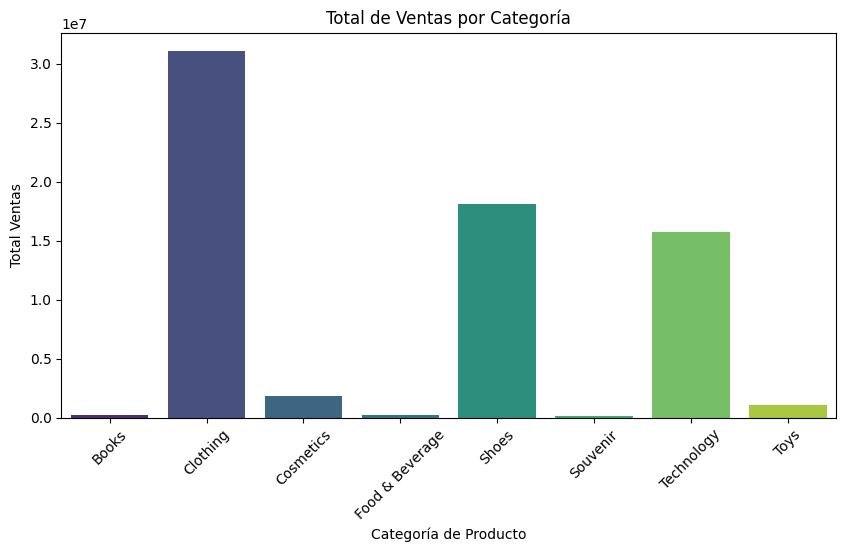

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Crear conexión a PostgreSQL
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Conexión exitosa")

# Carga del conjunto de datos de la tabla de hechos
df_fact_sales = pd.read_sql_table('fact_sales', engine)

ventas_categoria = df_fact_sales.groupby("category")["price"].sum().reset_index()

print("Ventas por categoría:")

plt.figure(figsize=(10, 5))
sns.barplot(x="category", y="price", data=ventas_categoria, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total de Ventas por Categoría")
plt.xlabel("Categoría de Producto")
plt.ylabel("Total Ventas")
plt.show()

Top 10 Clientes con Mayor Volumen de Compras:


C:\Users\kealm\AppData\Local\Temp\ipykernel_2488\1973032923.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="price", y="customer_id", data=ventas_clientes, palette="coolwarm")


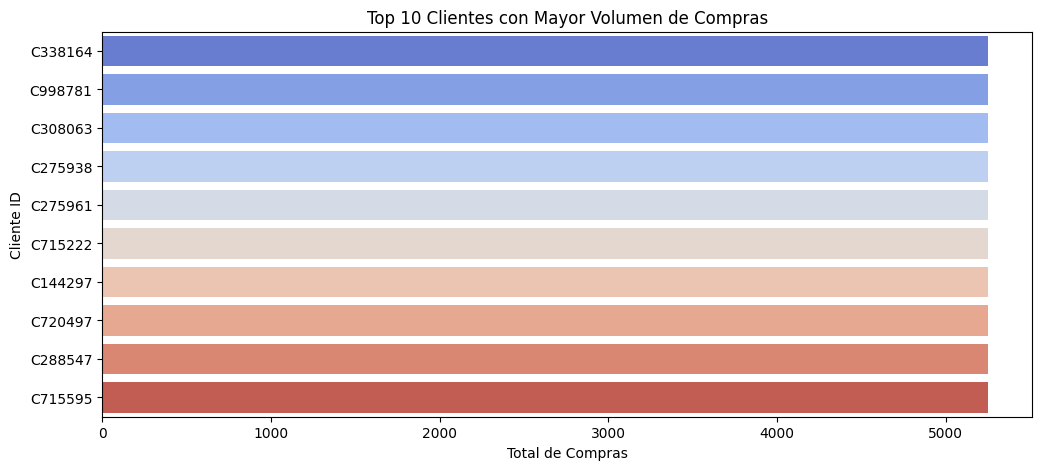

In [25]:
ventas_clientes = df_fact_sales.groupby("customer_id")["price"].sum().reset_index().sort_values(by="price", ascending=False).head(10)

print("Top 10 Clientes con Mayor Volumen de Compras:")

plt.figure(figsize=(12, 5))
sns.barplot(x="price", y="customer_id", data=ventas_clientes, palette="coolwarm")
plt.title("Top 10 Clientes con Mayor Volumen de Compras")
plt.xlabel("Total de Compras")
plt.ylabel("Cliente ID")
plt.show()

Distribución de Métodos de Pago:


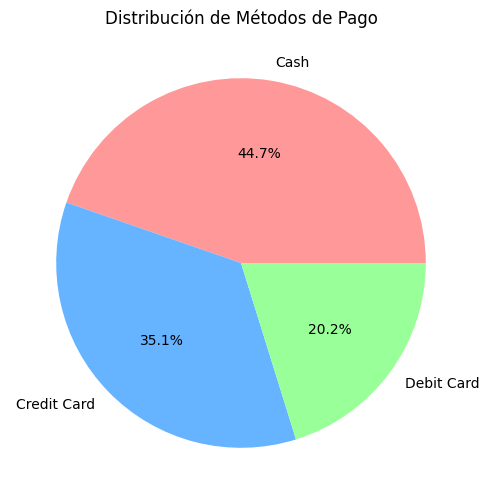

In [17]:
metodos_pago = df_fact_sales["payment_method"].value_counts()

print("Distribución de Métodos de Pago:")

plt.figure(figsize=(6, 6))
plt.pie(metodos_pago, labels=metodos_pago.index, autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Distribución de Métodos de Pago")
plt.show()

Evolución de Ventas por Mes:


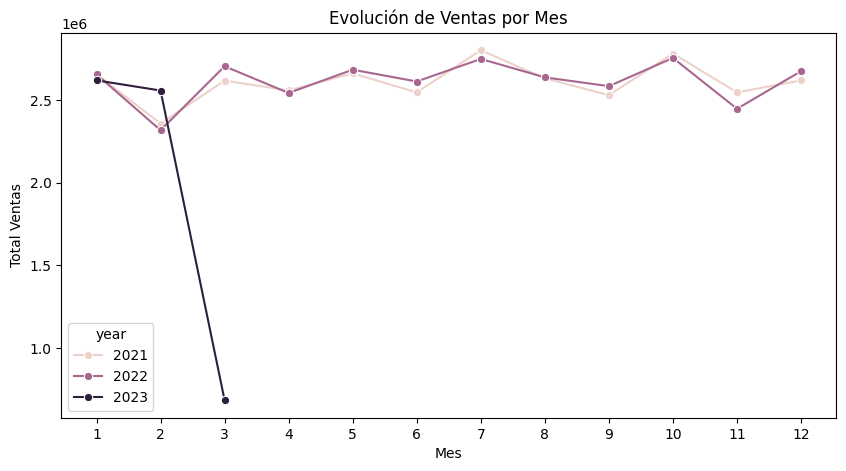

In [22]:

# Cargar la tabla dim_date desde la base de datos
dim_date = pd.read_sql_table('dim_date', engine)

fact_sales = df_fact_sales.merge(dim_date, on="invoice_date")
ventas_mes = fact_sales.groupby(["year", "month"])["price"].sum().reset_index()

print("Evolución de Ventas por Mes:")

plt.figure(figsize=(10, 5))
sns.lineplot(x=ventas_mes["month"], y=ventas_mes["price"], hue=ventas_mes["year"], marker="o")
plt.xticks(range(1, 13))
plt.title("Evolución de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Total Ventas")
plt.show()